In [113]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [95]:
data = pd.read_excel("waist_ff.xlsx")
data = data.rename({'Count Customers': 'customers', 'Waist': 'waist'}, axis=1)
data_leg_raw = pd.read_excel("leg_ff.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [107]:
data_leg = data_leg_raw.copy()

## Histogram

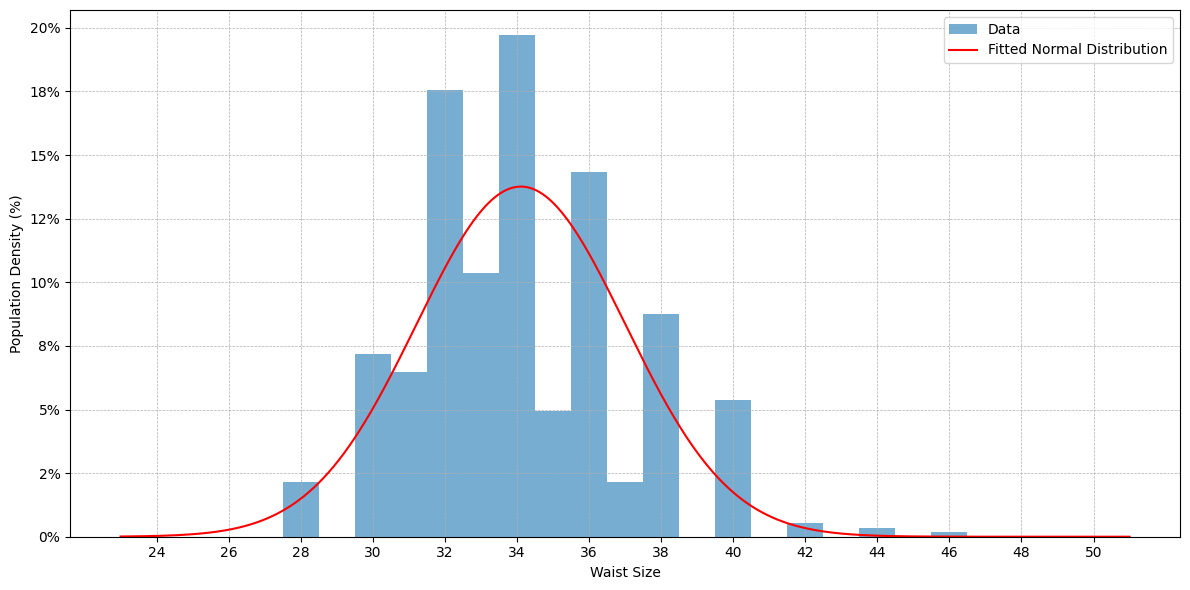

In [108]:
# Calculate the weighted samples for the waist sizes
weighted_samples = np.repeat(data['waist'], data['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

# Generate values for the x axis (waist sizes)
x = np.linspace(data['waist'].min() - 5, data['waist'].max() + 5, 1000)

# Calculate the normal distribution values for the x axis
pdf_fitted = norm.pdf(x, mu, std)

# Define bin edges to ensure bars are centered on waist values
bin_edges = np.arange(data['waist'].min() - 0.5, data['waist'].max() + 1.5, 1)

# Plot the data and the fitted normal distribution
plt.figure(figsize=(12, 6))
plt.hist(weighted_samples, bins=bin_edges, density=True, alpha=0.6, label='Data', align='mid')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Normal Distribution')
plt.xlabel('Waist Size')
plt.ylabel('Population Density (%)')
# Turn y-values into percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# plt.title('Waist Size Distribution')
waist_ticks = range(24, 51, 2)
plt.xticks(waist_ticks)

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


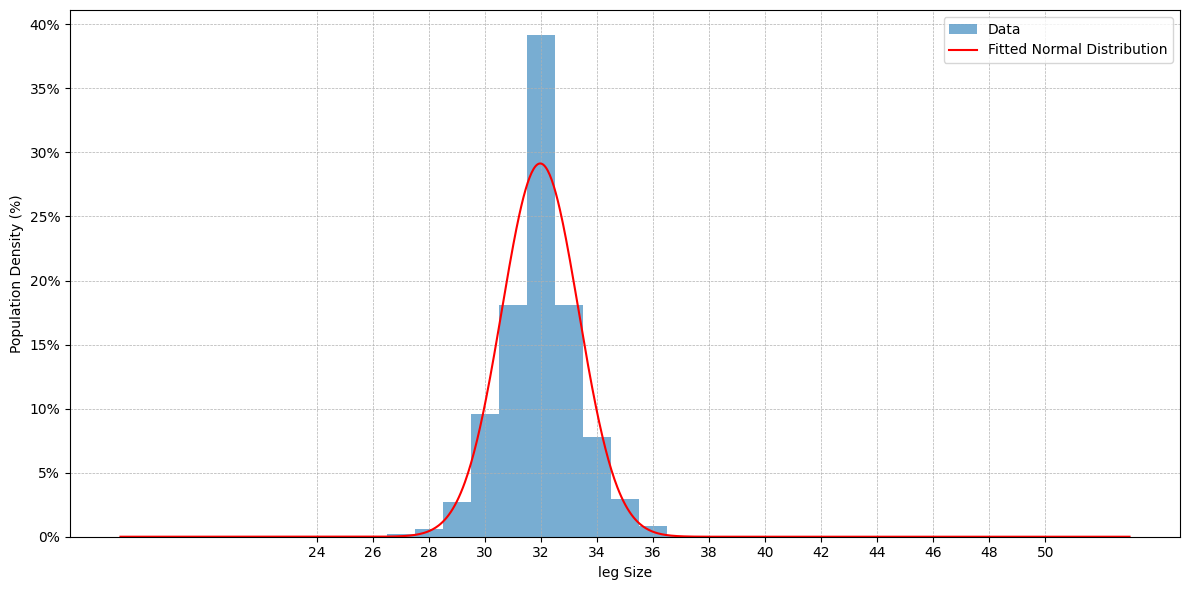

In [109]:
# Calculate the weighted samples for the leg sizes
weighted_samples = np.repeat(data_leg['leg'], data_leg['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

# Generate values for the x axis (leg sizes)
x = np.linspace(data_leg['leg'].min() - 5, data_leg['leg'].max() + 5, 1000)

# Calculate the normal distribution values for the x axis
pdf_fitted = norm.pdf(x, mu, std)

# Define bin edges to ensure bars are centered on leg values
bin_edges = np.arange(data_leg['leg'].min() - 0.5, data_leg['leg'].max() + 1.5, 1)

# Plot the data and the fitted normal distribution
plt.figure(figsize=(12, 6))
plt.hist(weighted_samples, bins=bin_edges, density=True, alpha=0.6, label='Data', align='mid')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Normal Distribution')
plt.xlabel('leg Size')
plt.ylabel('Population Density (%)')
# Turn y-values into percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# plt.title('leg Size Distribution')
leg_ticks = range(24, 51, 2)
plt.xticks(leg_ticks)

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


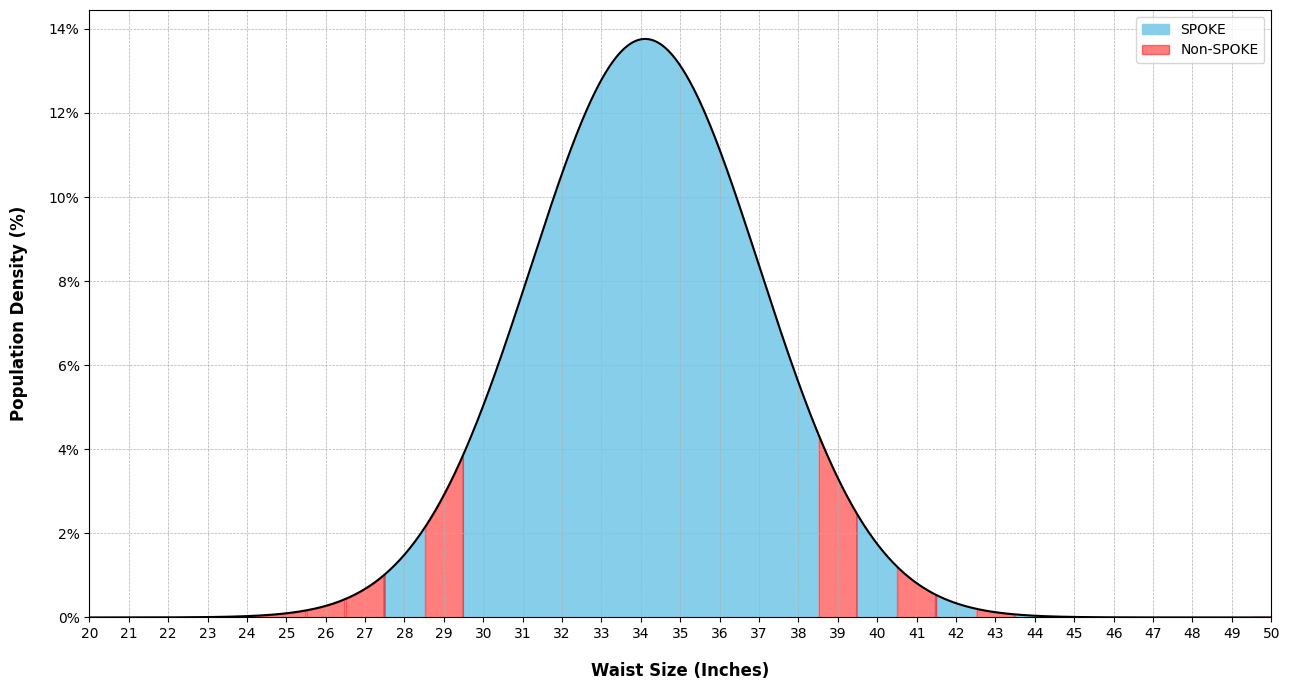

In [125]:


# Calculate the weighted samples for the waist sizes
weighted_samples = np.repeat(data['waist'], data['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

# Generate a new range for the x axis (waist sizes) based on user's requirements
x_new = np.linspace(20, 52, 1000)

# Calculate the normal distribution values for the new x axis range
pdf_fitted_new = norm.pdf(x_new, mu, std)

# Plot the data and the fitted normal distribution
plt.figure(figsize=(13, 7))

# Plot the fitted normal distribution for the new x range
plt.plot(x_new, pdf_fitted_new, 'k-', label='Fitted Normal Distribution')

# Shading areas based on presence in original table for the new x range
for waist in data['waist']:
    if 20 <= waist <= 52:  # only shade within the new range
        plt.fill_between(x_new, 0, pdf_fitted_new, where=((x_new >= waist - 0.55) & (x_new < waist + 0.5)), color='skyblue')

# Highlighting areas not present in the original data in red for the new x range
outside_data_new = [i for i in range(20, 53) if i not in data['waist'].values]
for waist in outside_data_new:
    plt.fill_between(x_new, 0, pdf_fitted_new, where=((x_new >= waist - 0.5) & (x_new < waist + 0.5)), color='red', alpha=0.5)

# Setting y=0 for the axis intersection, labeling axes, and setting x-axis limits
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Waist Size (Inches)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Population Density (%)', fontsize=12, fontweight='bold', labelpad=15)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlim(20, 48)  # Strictly set the x-axis limits to 22 and 52
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0

waist_ticks = range(20, 51, 1)
plt.xticks(waist_ticks)

red_patch = mpatches.Patch(color='skyblue', label='SPOKE')
blue_patch = mpatches.Patch(color='red', label='Non-SPOKE', alpha = 0.5)

plt.legend(handles=[red_patch, blue_patch])

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [121]:
from scipy.integrate import quad

# Calculate the weighted samples for the waist sizes
weighted_samples = np.repeat(data['waist'], data['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

# Integrate the normal distribution to get the total area under the curve from 20 to 52
total_area, _ = quad(lambda x: norm.pdf(x, mu, std), 20, 52)

# Calculate the area corresponding to the "Non-SPOKE" waist sizes
spoke_area = sum([quad(lambda x: norm.pdf(x, mu, std), waist-0.5, waist+0.5)[0] for waist in data['waist']])

# Subtract from the total area to get the "SPOKE" area
non_spoke_area = total_area - spoke_area

# Calculate the percentages
non_spoke_percentage_area = non_spoke_area / total_area
spoke_percentage_area = spoke_area / total_area

spoke_percentage_area, non_spoke_percentage_area

(0.9160345059447382, 0.08396549405526173)

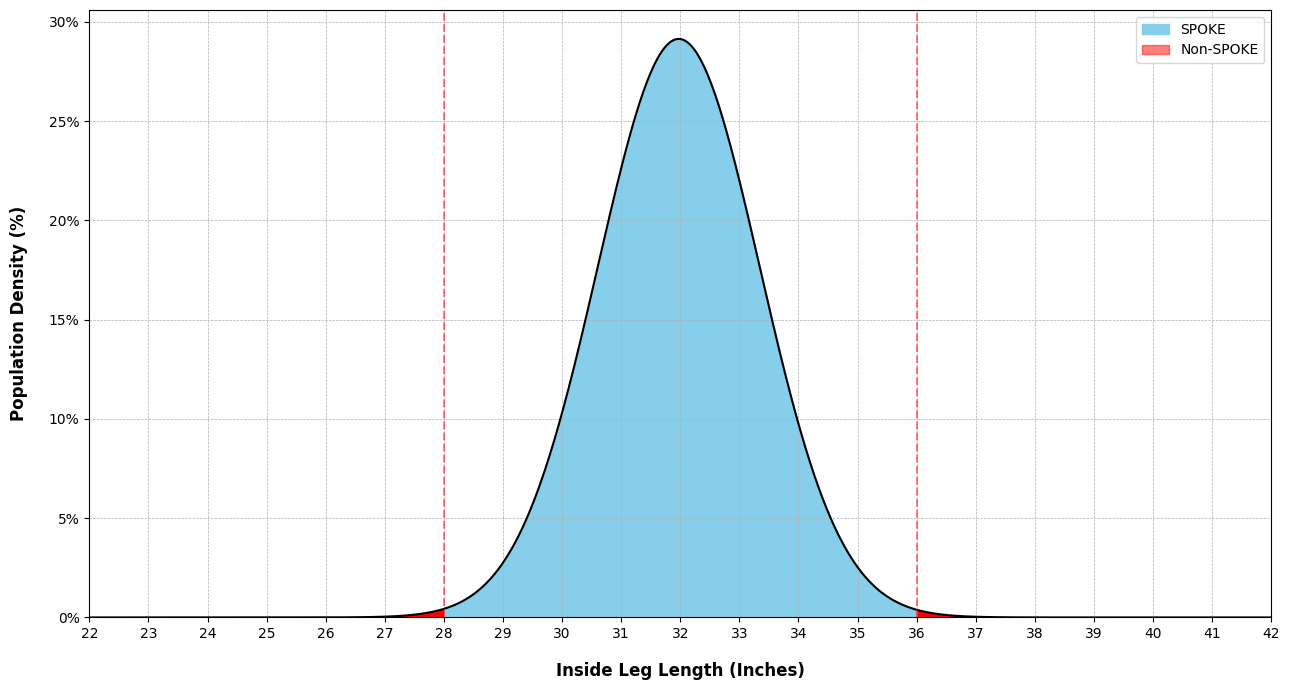

In [126]:


# Calculate the weighted samples for the waist sizes
weighted_samples = np.repeat(data_leg['leg'], data_leg['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

low_end = 22
high_end = 42

# Generate a new range for the x axis (waist sizes) based on user's requirements
x_new = np.linspace(low_end, high_end, 1000)

# Calculate the normal distribution values for the new x axis range
pdf_fitted_new = norm.pdf(x_new, mu, std)

# Plot the data and the fitted normal distribution
plt.figure(figsize=(13, 7))

# Plot the fitted normal distribution for the new x range
plt.plot(x_new, pdf_fitted_new, 'k-', label='Fitted Normal Distribution')

# Shade spoke/non-spoke
lower_limit = 28
upper_limit = 36

plt.fill_between(x_new, 0, pdf_fitted_new, where=(x_new < lower_limit), color='red')
plt.fill_between(x_new, 0, pdf_fitted_new, where=((x_new >= lower_limit) & (x_new <= upper_limit)), color='skyblue')
plt.fill_between(x_new, 0, pdf_fitted_new, where=(x_new > upper_limit), color='red')


# Setting y=0 for the axis intersection, labeling axes, and setting x-axis limits
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Inside Leg Length (Inches)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Population Density (%)', fontsize=12, fontweight='bold', labelpad=15)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlim(low_end, high_end)  # Strictly set the x-axis limits to 22 and 52
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0

leg_ticks = range(low_end, high_end+1, 1)
plt.xticks(leg_ticks)

red_patch = mpatches.Patch(color='skyblue', label='SPOKE')
blue_patch = mpatches.Patch(color='red', label='Non-SPOKE', alpha = 0.5)

plt.legend(handles=[red_patch, blue_patch])


plt.axvline(lower_limit, color='red', linestyle='--', alpha=0.5)
plt.axvline(upper_limit, color='red', linestyle='--', alpha=0.5)
# plt.axvline(32, color='black', linestyle='--', alpha=0.7)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [118]:
from scipy.integrate import quad
from scipy.stats import norm
import numpy as np

# Assuming data_leg is defined somewhere above or you have it in your code

# Calculate the weighted samples for the waist sizes
weighted_samples = np.repeat(data_leg['leg'], data_leg['customers'])

# Fit a normal distribution to the weighted samples
mu, std = norm.fit(weighted_samples)

# Integrate the normal distribution to get the total area under the curve from 20 to 52
total_area, _ = quad(lambda x: norm.pdf(x, mu, std), 20, 52)

# Calculate the area corresponding to the "SPOKE" leg sizes (between 28 and 36)
spoke_area, _ = quad(lambda x: norm.pdf(x, mu, std), 28, 36)

# Subtract from the total area to get the "Non-SPOKE" area
non_spoke_area = total_area - spoke_area

# Calculate the percentages
non_spoke_percentage_area = non_spoke_area / total_area
spoke_percentage_area = spoke_area / total_area

spoke_percentage_area, non_spoke_percentage_area


(0.9965080227595127, 0.0034919772404873317)